<a href="https://colab.research.google.com/github/physicist86/ML/blob/main/Fern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set number of fern points: 50


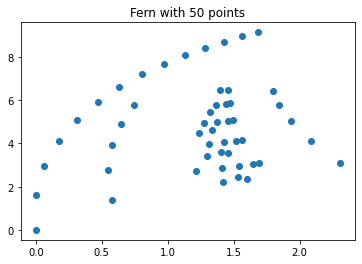

In [5]:
# Draw a Barnsley Fern
# Author: Alexander Le
# Date: May 30, 2022
# Source:  ISBN-13: 978-1-59327-640-9, pg. 165-166
import random
import matplotlib.pyplot as plt

# 0.85 probability
def transformation_1(p):
  x = p[0]
  y = p[1]
  x1 = 0.85*x + 0.04*y
  y1 = -0.04*x + 0.85*y +1.6
  return x1, y1

# 0.07 probability
def transformation_2(p):
  x = p[0]
  y = p[1]
  x1 = 0.2*x + 0.26*y
  y1 = 0.23*x + 0.22*y +1.6
  return x1, y1

# 0.07 probability
def transformation_3(p):
  x = p[0]
  y = p[1]
  x1 = -0.15*x + 0.28*y
  y1 = 0.26*x + 0.24*y + 0.44
  return x1, y1

# 0.01 probability
def transformation_4(p):
  x = p[0]
  y = p[1]
  x1 = 0
  y1 = 0.16*y
  return x1, y1

def get_index(probability):
  r = random.random()
  c_probability = 0
  sum_probability = []
  for p in probability:
    c_probability += p
    sum_probability.append(c_probability)
  for item, sp in enumerate(sum_probability):
    if r <= sp:
      return item
  return len(probability)-1

def transform(p):
  # Create a list of the transformation functions
  transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
  probability = [0.85, 0.07, 0.07, 0.01]
  # randomly get t(p)
  tindex = get_index(probability)
  t = transformations[tindex]
  x, y = t(p)
  return x, y

def draw_fern(n):
  # Start position at (0, 0)
  x = [0]
  y = [0]

  x1, y1 = 0,0
  for i in range (n):
    x1, y1 = transform((x1, y1))

    x.append(x1)
    y.append(y1)

  return x, y

if __name__ == '__main__':
  n = int(input('Set number of fern points: '))
  x, y = draw_fern(n)
  # plot
  plt.plot(x,y,'o')
  plt.title('Fern with {0} points'.format(n))
  plt.show()